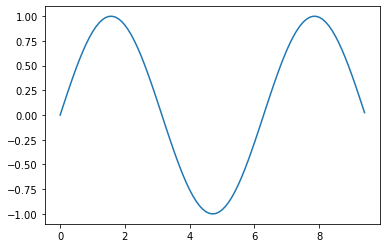

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Compute the x and y coordinates for points on a sine curve
x = np.arange(0, 3 * np.pi, 0.1)
y = np.sin(x)

# Plot the points using matplotlib
plt.plot(x, y)
plt.show()  # You must call plt.show() to make graphics appear.

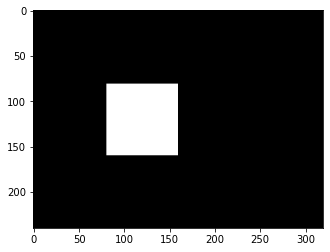

In [3]:
myImage = np.zeros((240,320))

# This code is exactly the same as the the code from our JS and C++ examples
TWO_PI = 3.14159 * 2
segments = 600
spacing = TWO_PI * 2 / segments
size = 40
centre = 120

for i in range(240):
    for j in range(320):
        if abs(centre-i) < size and abs(centre-j) < size:
            myImage[i,j]=1

plt.imshow(myImage, clim=(0,1),cmap="gray")
plt.show()

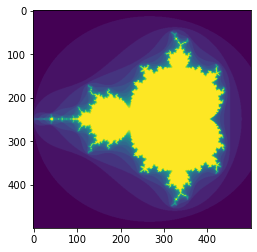

In [7]:
import numpy as np
import matplotlib.pyplot as plt 
def mandelbrot(h,w,maxit=20):
    y,x = np.ogrid[-1.4:1.4:h*1j,-2:0.8:w*1j]
    c = x+y*1j
    z = c 
    divtime = maxit + np.zeros(z.shape,dtype=int)
    for i in range(maxit):
        z = z**2 +c
        diverge = z*np.conj(z) > 2**2
        div_now = diverge & (divtime==maxit)
        divtime[div_now] = i 
        z[diverge] = 2 
    return divtime
 
plt.imshow(mandelbrot(500,500))
plt.show()

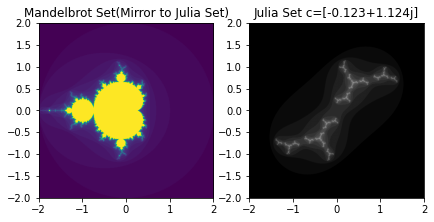

In [14]:
import numpy as np
import matplotlib.pyplot as plt
#引用numpy库，matplotlib


julia_C = -0.123 + 1.124j
#定义Julia set
def julia_set(x, y):
    z = np.array(x + 1j * y)
    r = np.zeros(z.shape)
    m = np.ones(z.shape, dtype=bool)
    for i in range(24):
        z[m] = z[m] ** 2 + julia_C
        m = np.abs(z) < 2
        r += m
    return r

def mandelbrot_set(x, y):
    c = np.array(x + 1j * y)
    z = np.zeros(c.shape, dtype=complex)
    r = np.ones(c.shape)
    m = np.ones(c.shape, dtype=bool)
    for i in range(50):
        z[m] = z[m] ** 2 + c[m]
        m = np.abs(z) < 2
        r += m
    return r

def complex_str(c):
    return np.array_str(np.array([julia_C]), suppress_small=True, precision=3)

def grid(width, offset, n):
    x = np.linspace(-width + offset, width + offset,n)
    y = np.linspace(-width, width, n)
    return np.meshgrid(x,y), (x.min(), x.max(), y.min(), y.max())

#分为两个图标绘制
fig, (ax, bx) = plt.subplots(1, 2)
ax.set_title("Mandelbrot Set(Mirror to Julia Set)")
bx.set_title("Julia Set c=" + complex_str(julia_C))

(X, Y), extent = grid(2, 0, 1000)
cf = ax.imshow(mandelbrot_set(X,Y), extent=extent)

(X, Y), extent = grid(2, 0, 1000)
julia = julia_set(X, Y)
img = bx.imshow(julia, extent=extent, cmap="gray")

def onclick(event):
    if event.inaxes != ax: return
    global X, Y, julia_C
    julia_C = event.xdata + 1j * event.ydata
    julia = julia_set(X, Y)
    img.set_data(julia)
    bx.set_title("Julia Set c=" + complex_str(julia_C))
    fig.canvas.draw_idle()

fig.canvas.mpl_connect('button_press_event', onclick)
plt.tight_layout()
plt.show()

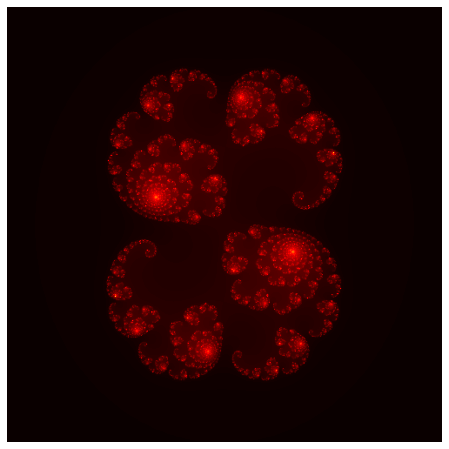

In [1]:
# -*- coding: utf-8 -*-
 
import numpy as np
import matplotlib.pyplot as plt
 
# 函数 loopmax 输出复数序列的计算次数
def loopmax(z, c):
    # 复数序列的第一项
    z_next = z
    # 最大计算次数
    num = 1000
    # 计算次数
    for i in range(1, num + 1):
        # 只要它不消散 
        if abs(z_next) <= 2:
            # 计算下一阶段
            z = z_next
            z_next = z ** 2 + c
        else:
            # 当完成了消散，就完成了
            break
    # 返回分歧时的计算次数。
    return i
 
# 函数 calc_n 在复数平面上输出 loopmax 的结果数组
def calc_n(x_min, x_max, y_min, y_max, a, b, num):
    # 定义实数轴的坐标，从x_min到x_max，间隔相等
    x_array = np.linspace(x_min, x_max, num)
    # 定义虚轴的坐标，从y_min到y_max，间隔相等
    y_array = np.linspace(y_min, y_max, num)
    # 定义复平面(dtype=np.complex，因为它是复平面)
    z_array = np.zeros((num, num), dtype=np.complex)
 # 在每个坐标上存储n的数组
    n_array = np.zeros((num, num))
    # 从a，b中定义一个常数复数c
    c = a + b * 1j
    #  存储复平面坐标和这些坐标中的计算次数
    for i in range(0, num):
        for j in range(0, num):
            # 复平面坐标
            z_array[j, i] = x_array[i] + y_array[j] * 1j
           # 计算时间数组
            n_array[j, i] = loopmax(z_array[j, i], c)
  # 输出包含计算次数的数组
    return n_array
 
# 函数show_patterns来绘制Julia set
def show_patterns(U, ax=None):
    ax.imshow(U, cmap=plt.cm.hot,
              interpolation='bilinear')
    ax.set_axis_off()

if __name__ == "__main__":
    # 选择要绘制的部分
    x_min = -1.5
    x_max = 1.5
    y_min = -1.5
    y_max = 1.5
 # 常数项的参数
    a = 0.285
    b = 0.01
    
  # 在复平面上定义的每个轴的坐标数
    num = 500
    # 从上述参数中输出计算时间的数组
    n_array = calc_n(x_min, x_max, y_min, y_max, a, b, num)
    #绘制
    fig, ax = plt.subplots(1, 1, figsize=(8, 8))
    show_patterns(n_array, ax=ax)
    # 保存图像
    plt.savefig('Julia.png', dpi=3500)